Nama : Muhammad Farhan Zein

username : farzeinn

email : farzein27@gmail.com

In [1]:
# Data Diri
# Nama : Muhammad Farhan Zein
# username : farzeinn
# email : farzein27@gmail.com

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-05-10 04:22:09--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  1.13MB/s    in 5m 14s  

2021-05-10 04:27:24 (1004 KB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
import os, zipfile

local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

base_dir = "/content/rockpaperscissors/rps-cv-images/"   

In [5]:
train_datagen = ImageDataGenerator(
                rescale = 1./255,
                rotation_range = 45,
                width_shift_range = 0.2,
                height_shift_range = 0.2,
                shear_range = 0.2,
                zoom_range = 0.3,
                horizontal_flip = True,
                fill_mode = 'nearest',
                validation_split = 0.4)

In [6]:
train_generator = train_datagen.flow_from_directory(
                  base_dir,
                  target_size = (100, 150), 
                  class_mode = 'categorical',
                  shuffle = True,
                  subset = 'training')
 
validation_generator = train_datagen.flow_from_directory(
                  base_dir,
                  target_size = (100, 150),
                  class_mode = 'categorical',
                  subset = 'validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [8]:
class StopTrain(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.96):
      print("AKURASI MODEL SUDAH LEBIH DARI 96%")
      self.model.stop_training = True

In [9]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'RMSprop',
              metrics = ['accuracy'])

In [10]:
model.fit(
      train_generator,
      steps_per_epoch = 36,
      epochs = 50,
      validation_data = validation_generator,
      validation_steps = 6,
      verbose = 2,
      callbacks = StopTrain())

Epoch 1/50
36/36 - 22s - loss: 1.1486 - accuracy: 0.3645 - val_loss: 1.0817 - val_accuracy: 0.4427
Epoch 2/50
36/36 - 20s - loss: 0.9737 - accuracy: 0.5303 - val_loss: 0.8207 - val_accuracy: 0.5938
Epoch 3/50
36/36 - 20s - loss: 0.8029 - accuracy: 0.6355 - val_loss: 0.7185 - val_accuracy: 0.6250
Epoch 4/50
36/36 - 20s - loss: 0.7171 - accuracy: 0.6756 - val_loss: 0.7537 - val_accuracy: 0.6562
Epoch 5/50
36/36 - 20s - loss: 0.6246 - accuracy: 0.7130 - val_loss: 0.4613 - val_accuracy: 0.8229
Epoch 6/50
36/36 - 20s - loss: 0.5441 - accuracy: 0.7665 - val_loss: 0.8814 - val_accuracy: 0.6667
Epoch 7/50
36/36 - 20s - loss: 0.5514 - accuracy: 0.7763 - val_loss: 0.3867 - val_accuracy: 0.8438
Epoch 8/50
36/36 - 20s - loss: 0.4948 - accuracy: 0.8137 - val_loss: 0.4289 - val_accuracy: 0.8177
Epoch 9/50
36/36 - 20s - loss: 0.4375 - accuracy: 0.8262 - val_loss: 0.3691 - val_accuracy: 0.8906
Epoch 10/50
36/36 - 20s - loss: 0.4031 - accuracy: 0.8289 - val_loss: 0.5822 - val_accuracy: 0.7344
Epoch 11/

In [11]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

Saving IMG_20210509_234544.jpg to IMG_20210509_234544.jpg
IMG_20210509_234544.jpg
scissors


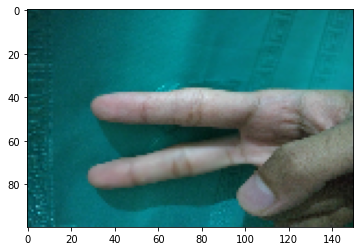

In [12]:
uploaded = files.upload()
 
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('unknown')